# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
# TODO: Minimum price of the data
minimum_price = prices.min()

# TODO: Maximum price of the data
maximum_price = prices.max()

# TODO: Mean price of the data
mean_price = prices.mean()

# TODO: Median price of the data
median_price = prices.median()

# TODO: Standard deviation of prices of the data
std_price = prices.std()

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,340.28


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **

RM: An increase in the number of rooms in homes in the neighborhood should imply an INCREASE of the MEDV, as a large (and therefore expensive) home should be more likely to appear in the neighborhood of large homes (and a small home should appear more frequently in ares where there are lots of small homes).

LSTAT: An increasing number of lower class neighbors will most likely DECREASE the MEDV, as lower class neighbor probably cannot afford to live in an expensive home, and low-cost homes in the neighborhood are likely to imply low cost of the home in question.

PTRATIO: 'Good' (expensive) schools are associated with a low student to teacher ratio. Therefore, an increase in the PTRATIO should go along with a DECREASE of MEDV, as home buyer probably value to have 'good' schools nearby.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 always fails to predict the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. *A model can be given a negative R<sup>2</sup> as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.*

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [3]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [4]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


In [5]:
#Further analysis
from sklearn.metrics import mean_squared_error, explained_variance_score
x,y=[3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3]
print "Correlation coefficient: {}".format(np.corrcoef(x,y)[1,0])
print "Mean squared error: {}".format(mean_squared_error(x,y))
print "Explained variance score: {}".format(explained_variance_score(x,y))

Correlation coefficient: 0.981231854503
Mean squared error: 0.472
Explained variance score: 0.949006276151


**Answer:**

The model indeed has quite successfully captured the variation of the target variable. The coefficient of determination is 0.923, which means that 92.3% of the variance in the true data is predictable with the model. The determined R^2 is already close to the theoretical maximum of 1. 

The further analysis shows that the mean squared error of model prediction vs. true value is <0.5, which appears reasonable for (true) values between -0.5 and 7.0. The correlation between true value and prediction is very high (~0.98), as is the explained variance (~0.95)

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [6]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=44)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: **

If a model is trained on a training data set, it should be tested against *test data*. The test data should not be included in the training data. 

If the model is not tested against dedicated test data, a high generalization error might go undetected. *Overfitting* might occur, which would produce a very good model fit to the training data (low variance) but poor fit to new data (high variance).
Measuring the model performance on test data provides a means to find the "sweet spot" when choosing the model complexity. 

Splitting the data set into training and test data can have the drawback of effectively reducing the amount of data used for training the model, however this can be avoided by using K-fold cross validation.


----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

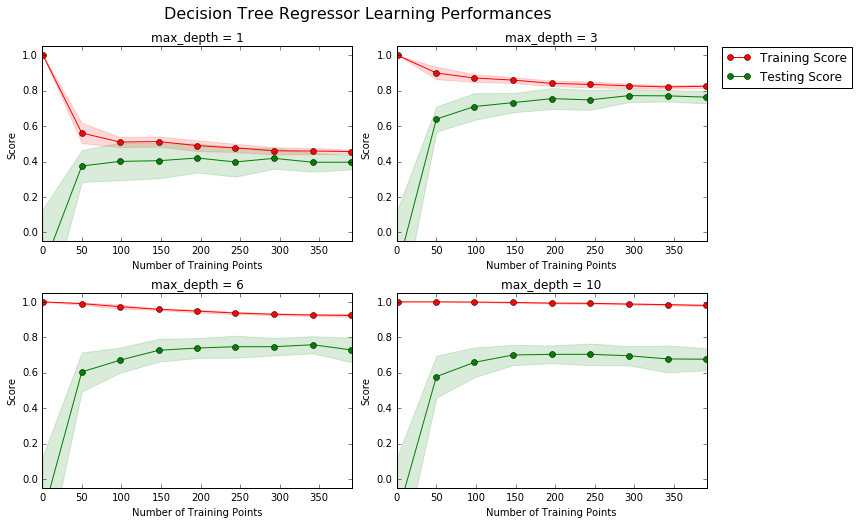

In [7]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: **

Judging from the graphs, max_depth=3 as depicted in the second graph seems to be suitable for the model and is described in the following.

The *training score* appears very high (close to 1) for a very small number of data points and then deterioriates with more training points. At about 300 data points, the training score plateaus at just above 0.8.

The *testing score* increases with growing number of training points used. At about 300 data points, the testing score plateaus as well, at just below 0.8.

Seeing training and testing score converge to reasonably high values with growing number of training points, we can also notice that the gap between training and testing score is quite small (~0.05), much smaller than for larger values of max_depth. This indicates that the model complexity with max_depth=3 is a good compromise between bias and variance and is likely to produce a low prediction error. And indeed, the testing score with max_depth=3 is better than for the other values of max_depth in the depicted learning curves.

More data is generally likely to reduce the testing error further (i.e. increase the testing score). Having said that, the gain in testing score is probably only *very small*, as there is hardly any increase in testing score for above 300 training points. Therefore, one can probably refrain from using more training points.


### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

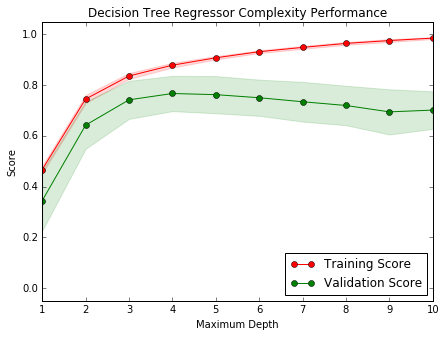

In [8]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **

With a maximum depth of 1, the model suffers from high bias, i.e. the model is not complex enough to provide a suitable match to the "true" function ("underfitting"). The generally poor model score (for both training and validation) as visible in the graph is an indication of high bias. 

When the model is trained with a maximum depth of 10, the bias is small, but the variance is high. This means that the model is "overfitting" and is falsely optimized to features in the training data, which are in reality not relevant. In the graph, we can see a large gap between traning and validation score, which is an indication of high variance.

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: **

The validation test score is the best metric at hand to assess the model performance with unseen data. Therefore, a **maximum depth of 4** is most promising to deliver the best generalization, as the validation score is highest with this depth. Also, the gap between training and validation score is reasonably small (but not minimal) for max_depth=4.

Generally, the observed complexity curve fits nicely to the theoretical expectation for testing and generalization error vs. model complexity: While testing error should decrease monotonously (i.e. training score increases monotonously) with growing complexity, the generalization error should have a "U"-shape, i.e. a minimum for a certain complexity (here: validation score should have a maximum for a certain complexity), as seen in the curve.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: **

Grid search is a technique that systematically analyzes multiple combinations of model hyperparameter settings and determines the hyperparameter set that yields the best model performance. An example for a hyperparameter is the maximum depth as discussed in the previous section.

Once a learning algorithm is found/chosen, grid search can be applied to optimize it by fine-tuning the hyperparameters that the algorithm uses. The user usually provides a finite list of possible settings for each hyperparameter and applies grid search to determine optimal values (see http://www.deeplearningbook.org/ Chapter 11.4.3).

scikit-learn.grid_search provides tools for the execution of grid search. 

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **

As shown in the lessons, k-fold cross validation is a technique that partitions the available data into k bins. In k runs, each bin is used as validation data, while the other bins are used as training data. Finally, the average of all k observed validation results (prediction error) is calculated.

The benefit of the k-fold cross validation is that the entire data set is used for training, and for validation; this is helpful to assess the model generalization performance. K-fold cross validation is especially advisable when dealing with data sets that are potentially too small for the problem at hand.

When using the grid search technique to identify the optimal choice for model hyperparameters, (k-fold) cross validation should be used to investigate how a certain hyperparameter set affects the model's generalization performance.



### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [9]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=44)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [10]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer: **

The optimal model has maximum depth = 4. 

This is consistent with my answer to question 6.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [11]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions (Modified!)
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}, that is {:,.1f} sd relative to mean".format(i+1, price, (price-prices.mean())/prices.std())

Predicted selling price for Client 1's home: $405,946.15, that is -0.3 sd relative to mean
Predicted selling price for Client 2's home: $222,337.50, that is -1.4 sd relative to mean
Predicted selling price for Client 3's home: $954,712.50, that is 3.0 sd relative to mean


In [12]:
# Some additional statistics to the previously calculated statistics:
featuremat=['RM', 'LSTAT', 'PTRATIO']
print "Statistics for number of rooms: "
print features['RM'].describe()
print
print "Statistics for neighborhood poverty level: "
print features['LSTAT'].describe()
print
print "Statistics for student-teacher ratio of nearby schools: "
print features['PTRATIO'].describe()
print
for i in range(3):
    print "Client {}:".format(i+1)
    for feature in featuremat:
         print "Feature {} is {:,.1f} sd relative to mean.".format(feature, \
                (client_data[i][featuremat.index(feature)] - features[feature].mean())/  features[feature].std()  )
#(client_data[i,0]-features[feature].mean)/features[feature.std] )

Statistics for number of rooms: 
count    489.000000
mean       6.240288
std        0.643650
min        3.561000
25%        5.880000
50%        6.185000
75%        6.575000
max        8.398000
Name: RM, dtype: float64

Statistics for neighborhood poverty level: 
count    489.000000
mean      12.939632
std        7.081990
min        1.980000
25%        7.370000
50%       11.690000
75%       17.120000
max       37.970000
Name: LSTAT, dtype: float64

Statistics for student-teacher ratio of nearby schools: 
count    489.000000
mean      18.516564
std        2.111268
min       12.600000
25%       17.400000
50%       19.100000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64

Client 1:
Feature RM is -1.9 sd relative to mean.
Feature LSTAT is 0.6 sd relative to mean.
Feature PTRATIO is -1.7 sd relative to mean.
Client 2:
Feature RM is -3.5 sd relative to mean.
Feature LSTAT is 2.7 sd relative to mean.
Feature PTRATIO is 1.6 sd relative to mean.
Client 3:
Feature RM is 2.7

# **Answer: **

In addition to the price prediction of the model, I make an argument based on where the individual client's houses are positioned regarding their features (RM, LSTAT, and PTRATIO), which might justify the predicted price.

*Client 1*: The model predicts a selling price of $405,946.15.
Features 1 and 2 are worse than average (mean), by ~1.9 and 0.6 standard deviations, respectively. Feature 3 (S-T ratio) is better than average (by ~1.7 standard deviations). Therefore it appears reasonable that the house's price is close to, but probably slightly lower than the mean price, which is the case (about 0.3 standard deviation below mean).

*Client 2*: The model predicts a selling price of $222,337.50.
All features are consistently worse than average, by between 1.6 and 3.5 standard deviations. Therefore it seems appropriate that the house price is also clearly below average (by 1.4 standard deviations w.r.t. the mean price).

*Client 3*: The model predicts a selling price of $954,712.50. 
All features are consistently better than the mean, by between 1.4 and 3.1 standard deviations. The price is a hefty 3 standard deviations above the mean. That may seem a lot, but a quick look at the data sorted by price reveals that there are several houses that yield between 900,000 and 1,000,000 dollars with similar features (RM=~[7.4...8.3]; LSTAT=[3...4]; PTRATIO=[13...17.5]). Therefore, the price of just below a million dollars does not appear exaggerated.

Sticking to this thought, it may be an interesting exercise to apply a k-nearest-neighbors analysis to get a second prediction of the house price. This is done below (with k=1). Note that all results are slightly lower (too low?) than the above predictions... maybe I made a mistake in the k-nearest-neighbors calculation. Might it help to normalize the data before doing the neighbor analysis?

In [46]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1, weights='uniform')
neigh.fit(features, prices) 

for i, price in enumerate(neigh.predict(client_data)):
    print "Predicted selling price for Client {}'s home via nearest neighbor analysis: ${:,.2f}".format(i+1, price)

#print(neigh.predict([[1.1]]))

#print(neigh.predict_proba([[0.9]]))

Predicted selling price for Client 1's home via nearest neighbor analysis: $327,600.00
Predicted selling price for Client 2's home via nearest neighbor analysis: $155,400.00
Predicted selling price for Client 3's home via nearest neighbor analysis: $913,500.00


## Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [47]:
from visuals import PredictTrials # Supplementary code - I modified it to output the std of the predicted prices.
PredictTrials(features, prices, fit_model, client_data)

Trial 1: $411,000.00
Trial 2: $411,417.39
Trial 3: $415,800.00
Trial 4: $428,316.00
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $402,531.82
Trial 10: $413,700.00

Std in prices: $7,407.24

Range and Std in prices: $28,652.84 


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **

While the model appears to be relatively robust (standard deviation for house price of 10 runs is less than 2%), there are several factors that make it appear unsuited for use in a real-world setting. The model data is so old that...

1. any prices contained (even if adjusted for inflation) most likely do not represent current real estate prices. Current prices might be higher/lower, or have a smaller/large standard deviation.

2. the features contained are probably subject to change as a whole. E.g. there might have been a general trend to have more or less teachers per student at Boston schools than in 1978, or the Boston poverty ratio may have risen or declined in the last 38 years.

3. the chosen feature might lose their relevancy, e.g. the number of rooms in neighborhood houses might no be that useful anymore as a criterion as it was in 1978. 

Another context switch (in addition to the nearly 40 years in time between the model on 1978's data and Boston today), such as using the data for other cities or even rural areas would make its usefulness even more questionable. Some criteria are probably very different in different contexts (for example the poverty rate might be very different in different cities, e.g. what would count as low in Detroit could be high in San Francisco; or the average house price in Boston might be several times higher than the house price in a rural are in the Midwest). In short, all the issues mentioned above would probably be amplified if an attempt was made to use the model in different context.

In general, the approach to constucting a model COULD be reused with better (more current, context-specific) data. It is out of scope of this project to analyze which features are most significant for the predicition of a house price, but this analysis would be very helpful for the construction of a model (one might start by calculating correlation coefficients between a feature and the price).